In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
data.feature_names, data.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [4]:
X = data.data
Y = data.target

In [5]:
X.shape, Y.shape

((150, 4), (150,))

In [6]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [10]:
#Training the model
clf = DecisionTreeClassifier(criterion = 'entropy')

In [11]:
?DecisionTreeClassifier

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### DecisionTreeClassifier (criterion = ‘gini’, random_state = None, max_depth = None, min_samples_leaf =1)

Here are a few important parameters:

criterion: It is used to measure the quality of a split in the decision tree classification. By default, it is ‘gini’; it also supports ‘entropy’.
max_depth: This is used to add maximum depth to the decision tree after the tree is expanded.
min_samples_leaf: This parameter is used to add the minimum number of samples required to be present at a leaf node.

In [13]:
predictions = clf.predict(X_test)

In [14]:
accuracy_score(y_test, predictions)

0.9777777777777777

In [15]:
accuracy_score(y_train, clf.predict(X_train))

1.0

In [16]:
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=50)
clf.fit(X_train, y_train)
print("Test set accuracy - ", accuracy_score(y_test, clf.predict(X_test)))
print("Train set accuracy - ", accuracy_score(y_train, clf.predict(X_train)))

Test set accuracy -  0.9111111111111111
Train set accuracy -  0.9619047619047619


In [17]:
clf = DecisionTreeClassifier(criterion = 'gini')
clf.fit(X_train, y_train)
print("Test set accuracy - ", accuracy_score(y_test, clf.predict(X_test)))
print("Train set accuracy - ", accuracy_score(y_train, clf.predict(X_train)))

Test set accuracy -  0.9777777777777777
Train set accuracy -  1.0


In [18]:
clf = DecisionTreeClassifier(criterion = 'gini', min_samples_split=50)
clf.fit(X_train, y_train)
print("Test set accuracy - ", accuracy_score(y_test, clf.predict(X_test)))
print("Train set accuracy - ", accuracy_score(y_train, clf.predict(X_train)))

Test set accuracy -  0.9111111111111111
Train set accuracy -  0.9619047619047619


## Visualize the tree using Graphviz

In [19]:
#!pip install graphviz

In [20]:
from sklearn.tree import export_graphviz

In [21]:
import graphviz

In [22]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(                           # Create dot data
    clf, filled=True, rounded=True,special_characters=True,
    class_names=['Setosa', 'Versicolor','Virginica'],
    feature_names= data.feature_names,
    out_file=None
)

graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
graph.write_png('clf.png')                           # Write graph to PNG image

True

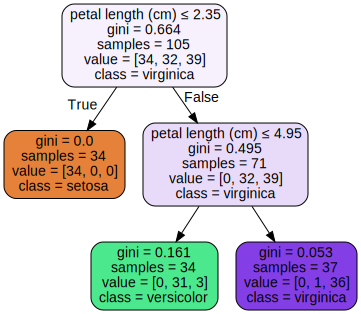

In [23]:
from pydotplus.graphviz import graph_from_dot_data

dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=data.feature_names,  
                     class_names=data.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [24]:
from sklearn.tree import export_graphviz

export_graphviz(clf, out_file = 'clf_tree.dot')

#### After executing this step, the ‘clf_tree.dot’ file will be saved in your system. Now to visualize the tree, open this file with the ‘.dot’ extension and copy the graphviz data. Then, go to the site ‘http://www.webgraphviz.com/’ and paste the graphviz data there.

In [25]:
clf.feature_importances_

array([0., 0., 1., 0.])

In [26]:
graphviz?